# STEP #0: IMPORT LIBRARY

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string, re
from nltk.stem.wordnet import WordNetLemmatizer

#STEP #1: IMPORT DATASET

In [ ]:
dataset = pd.read_excel('sample.xlsx')

In [ ]:
dataset.head()

,Number,User Name,Sex,Relationship status,Occupation,Age,User Description / About,About in Bangla,Location(Division),Time Acount Was Created,No. Of Friends,Followers,Date of Post,Time of Post,Label,Post,Text
0,1,Md Tarek,Male,Married,Business,30-35,I am an handsome boy.,NaN,Chattogram,4/09/19,874.0,NaN,2022-10-05,0.691667,1,Sacrifice without father is very sad. Remember...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...
1,2,TR Raihan,Male,Single,Student,21-25,Be Careful What you Tell People. A Friend Toda...,NaN,Chattogram,NaN,NaN,37,2022-06-07,0.419444,1,Feeling unbearable is terrible 😅👈,অসহ্য অনুভূতি ভয়ানক 😅👈
2,3,Maharaj Chy Oni,Male,Single,Student,21-25,1 index ☝The roar of 1 thunder 🗣 1 red green f...,NaN,Chattogram,NaN,NaN,NaN,2022-06-30,0.107639,1,"⭕ In these rainy days, Let us be a little more...","এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময..."
3,4,Arif Ullah,Male,Single,Student,25-30,"To whom personal rights arise, Can't tolerate ...",NaN,Chattogram,NaN,NaN,368,2022-06-30,0.657639,1,"Sky why are you cloudy, Who told you? Have you...","আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের..."
4,5,Mirza Safayat,Male,Single,Student,25-30,NaN,NaN,Chattogram,NaN,NaN,NaN,2022-07-13,0.125,1,I'm very depressed,আমি খুব বিষণ্ণ


# STEP #2: VISUALIZE DATASET

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Number                    290 non-null    int64         
 1   User Name                 259 non-null    object        
 2   Sex                       288 non-null    object        
 3   Relationship status       256 non-null    object        
 4   Occupation                206 non-null    object        
 5   Age                       78 non-null     object        
 6   User Description / About  239 non-null    object        
 7   About in Bangla           225 non-null    object        
 8   Location(Division)        288 non-null    object        
 9   Time Acount Was Created   140 non-null    object        
 10  No. Of Friends            78 non-null     float64       
 11  Followers                 171 non-null    object        
 12  Date of Post          

In [ ]:
dataset.shape

(290, 17)

In [ ]:
dataset.dtypes

Number                               int64
User Name                           object
Sex                                 object
Relationship status                 object
Occupation                          object
Age                                 object
User Description / About            object
About in Bangla                     object
Location(Division)                  object
Time Acount Was Created             object
No. Of Friends                     float64
Followers                           object
Date of Post                datetime64[ns]
Time of Post                        object
Label                                int64
Post                                object
Text                                object
dtype: object

In [ ]:
dataset.head(5)

,Number,User Name,Sex,Relationship status,Occupation,Age,User Description / About,About in Bangla,Location(Division),Time Acount Was Created,No. Of Friends,Followers,Date of Post,Time of Post,Label,Post,Text
0,1,Md Tarek,Male,Married,Business,30-35,I am an handsome boy.,NaN,Chattogram,4/09/19,874.0,NaN,2022-10-05,0.691667,1,Sacrifice without father is very sad. Remember...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...
1,2,TR Raihan,Male,Single,Student,21-25,Be Careful What you Tell People. A Friend Toda...,NaN,Chattogram,NaN,NaN,37,2022-06-07,0.419444,1,Feeling unbearable is terrible 😅👈,অসহ্য অনুভূতি ভয়ানক 😅👈
2,3,Maharaj Chy Oni,Male,Single,Student,21-25,1 index ☝The roar of 1 thunder 🗣 1 red green f...,NaN,Chattogram,NaN,NaN,NaN,2022-06-30,0.107639,1,"⭕ In these rainy days, Let us be a little more...","এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময..."
3,4,Arif Ullah,Male,Single,Student,25-30,"To whom personal rights arise, Can't tolerate ...",NaN,Chattogram,NaN,NaN,368,2022-06-30,0.657639,1,"Sky why are you cloudy, Who told you? Have you...","আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের..."
4,5,Mirza Safayat,Male,Single,Student,25-30,NaN,NaN,Chattogram,NaN,NaN,NaN,2022-07-13,0.125,1,I'm very depressed,আমি খুব বিষণ্ণ


In [ ]:
dataset.tail(5)

,Number,User Name,Sex,Relationship status,Occupation,Age,User Description / About,About in Bangla,Location(Division),Time Acount Was Created,No. Of Friends,Followers,Date of Post,Time of Post,Label,Post,Text
285,288,Muhsin Hossain Saon,Male,Single,Student,NaN,Mashallah Alhamdulillah,মাশাল্লাহ আলহামদুলিল্লাহ,Chattogram,NaN,NaN,NaN,2022-06-26,NaN,1,The burden of responsibility can be understood...,NaN
286,289,Muhsin Hossain Saon,Male,Single,Student,NaN,Mashallah Alhamdulillah,মাশাল্লাহ আলহামদুলিল্লাহ,Chattogram,NaN,NaN,NaN,2022-06-19,NaN,1,"Over time,\nChange is the mind, change is the ...",NaN
287,290,Muhsin Hossain Saon,Male,Single,Student,NaN,Mashallah Alhamdulillah,মাশাল্লাহ আলহামদুলিল্লাহ,Chattogram,NaN,NaN,NaN,2022-06-13,NaN,1,"Dreams will be fulfilled one day,✊\nThis is al...",NaN
288,291,Muhsin Hossain Saon,Male,Single,Student,NaN,Mashallah Alhamdulillah,মাশাল্লাহ আলহামদুলিল্লাহ,Chattogram,NaN,NaN,NaN,2022-06-11,NaN,1,What's the point of crying after death 🫤,NaN
289,292,Muhsin Hossain Saon,Male,Single,Student,NaN,Mashallah Alhamdulillah,মাশাল্লাহ আলহামদুলিল্লাহ,Chattogram,NaN,NaN,NaN,2022-06-04,NaN,0,"On the bank of the river, on the sand banks.",NaN


In [ ]:
dataset.describe()

,Number,No. Of Friends,Label
count,290.000000,78.000000,290.000000
mean,146.368966,5749.551282,0.703448
std,84.714165,3773.310396,0.457527
min,1.000000,323.000000,0.000000
25%,73.250000,3893.000000,0.000000
50%,145.500000,3893.000000,1.000000
75%,219.750000,9973.250000,1.000000
max,292.000000,12000.000000,1.000000


In [ ]:
# Let's see which message is the most popular ham/spam message
dataset.groupby('Label').describe()

Number                                                            \
       count        mean        std  min     25%    50%     75%    max   
Label                                                                    
0       86.0  190.151163  79.580003  7.0  169.00  218.0  240.75  292.0   
1      204.0  127.911765  80.066303  1.0   63.75  116.5  185.25  291.0   

      No. Of Friends                                                    \
               count         mean          std     min     25%     50%   
Label                                                                    
0                5.0  4440.400000  4434.063182  1208.0  1208.0  3893.0   
1               73.0  5839.219178  3742.615133   323.0  3893.0  3893.0   

                         
           75%      max  
Label                    
0       3893.0  12000.0  
1      12000.0  12000.0

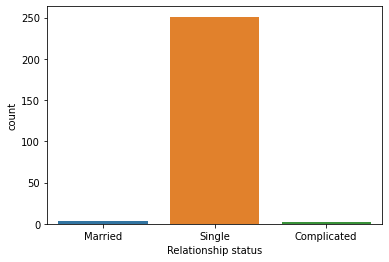

In [ ]:
sns.countplot(dataset['Relationship status'], label = "Count")

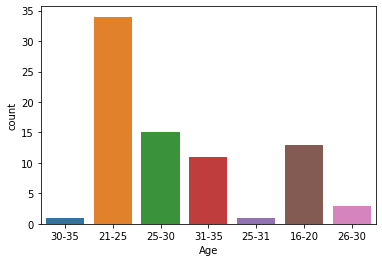

In [ ]:
sns.countplot(dataset['Age'], label = "Count")

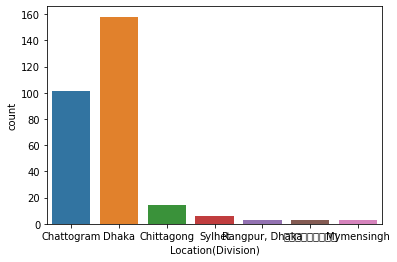

In [ ]:
sns.countplot(dataset['Location(Division)'], label = "Count")

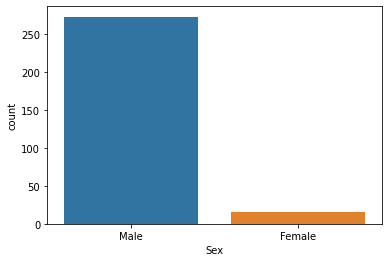

In [ ]:
sns.countplot(dataset['Sex'], label = "Count")

In [ ]:
df = pd.read_excel('check_test.xlsx')

In [ ]:
data = df[['Text', 'Label']]
data.head()

,Text,Label
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1
2,"এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময...",1
3,"আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের...",1
4,আমি খুব বিষণ্ণ,1


In [ ]:
# Let's get the length of the messages
data['length'] = data['Text'].apply(len)

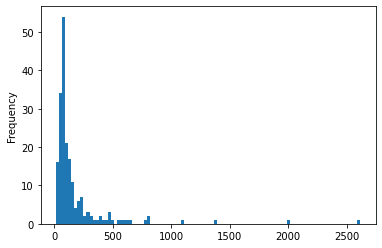

In [ ]:
data['length'].plot(bins=100, kind='hist') 

In [ ]:
data.length.describe()

count     199.000000
mean      177.170854
std       283.595549
min        14.000000
25%        66.500000
50%        88.000000
75%       161.000000
max      2619.000000
Name: length, dtype: float64

In [ ]:
# Let's see the longest message 43952
data[data['length'] == 2619]['Text'].iloc[0]

'কেউ অহেতুক ঘৃণা করুক বিষয়টা আমার ভাল লাগে না। তাই মাঝে মাঝেই একটা কাজ করি , আমাকে যারা গালি দেন তাদের জিগ্যেস করি কেন দিলেন, বেশির ভাগ ক্ষেত্রেই মানুষটা ইনবক্সে সরি বলেন অথবা এতটাই লজ্জিত হন যে ব্লক করে দেন। এই কাজটা আমি ২০১৩ থেকে করি। ২০১৩ তে একটা ছেলে টানা তিন মাসে অলমোস্ট রোজ এসে গালি দিয়ে যেত, একবার সে বলেই বসল যেখানে পাবে খুন করে ফেলবে। আমি সেই ছেলের বাসা খুঁজে বের করলাম, তারপর ওর বাড়িতে গিয়ে ওর বাড়ির সবার সাথে পরিচিত হলাম। খালাম্মা খুব যত্ন করে পিঠা খাইয়েছিলেন। আমি ওর সম্পর্কে ওর পরিবারের কাউকে কিছুই বলিনি। ফেরার সময় ও খুব করে মাপ চেয়েছিল। সত্যি বলতে ওকে লজ্জা দেবার জন্য যাইনি, গিয়েছিলাম এটা বোঝাতে আমি খারাপ মানুষ না। আমাকে মারতে চাওয়ার আগে তোমার উচিৎ আমার সাথে অন্তত একদিন আড্ডা দেয়া। ছেলেটা আমার লিস্টে আছে, খুব ভাল যোগাযোগ আছে ওর সাথে। আচ্ছা এই যে আমরা একজন মানুষ কে না জেনে,  না চিনে,  তার একটা লেখার সাথে আমার মনের মিল না হাওয়ায় তার প্রতি তীব্র ঘৃণা পোষণ করে ফেলছি, সেটা কি আমরা খেয়াল করেছি? অথচ ৭০ বছর পরে আপনি আর সে কেউ বেঁচে থাকবে না। আপনারা সারা জীবন এক জন আর এক

In [ ]:
# Let's divide the messages into spam and ham

In [ ]:
not_depressed = data[data['Label']==0]

In [ ]:
depressed = data[data['Label']==1]

In [ ]:
depressed

,Text,Label,length
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23
2,"এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময...",1,92
3,"আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের...",1,117
4,আমি খুব বিষণ্ণ,1,14
...,...,...,...
194,বদ্দা_\nআবেগ দিয়ে দুনিয়া চলে না_!!,1,33
195,★“মৃত্যু”>🤕\nমানে_মুক্তি*😷,1,25
196,বেকারদের কোনো চাওয়া থাকতে হয় নাহ.!!😷,1,36
197,যেটা আশা করি সেটা হয় না আর যেটা হয় সেটা আশা ...,1,57


In [ ]:
not_depressed

,Text,Label,length
6,সব আবেগ আর ভালোবাসা পেলে যান্ত্রিক শহরে আসতে ব...,0,142
8,অনেক ঘুরতে ভালোবাসি😊,0,20
11,আরও 16 মিলিয়ন নারী হওয়া সত্ত্বেও\nঅবিবাহিত হ...,0,135
13,"ধর্ম যার যার , উৎসব সবার । \nপবিত্র ঈদ-উদ-আযহা...",0,169
14,"আলহামদুলিল্লাহ , \nঅষ্টম সেমিস্টারের রেজাল্ট ...",0,132
15,টাকার অভাবে কুরবানী না দেওয়া লজ্জার নয় । \nন...,0,81
16,মন আমার কেমন কেমন করে\n🥵🥵🥵,0,25
18,জনস্বার্থে পদ্মা সেতুর উপরে মাঝামাঝি জায়গায় এক...,0,101
19,ভারতের পানি ছেড়ে দেওয়ার দোষ দিয়ে বাংলাদেশ ড...,0,132
20,দৃশ্যটা খুব সুন্দর তাই না?\n#কিন্তু কাজগুলো মো...,0,226


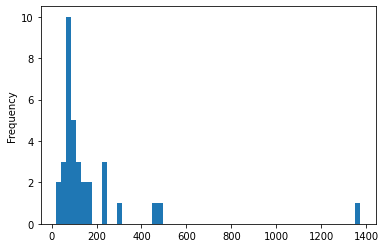

In [ ]:
not_depressed['length'].plot(bins=60, kind='hist') 

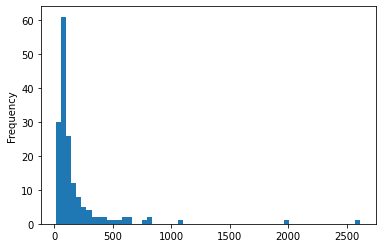

In [ ]:
depressed['length'].plot(bins=60, kind='hist') 

In [ ]:
print( 'not_depressed percentage =', (len(not_depressed) / len(df) )*100,"%")

not_depressed percentage = 17.08542713567839 %


In [ ]:
print( 'depressed =', (len(depressed) / len(df) )*100,"%")

depressed = 82.91457286432161 %


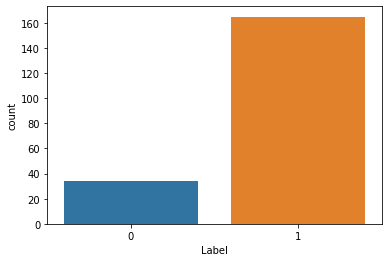

In [ ]:
sns.countplot(df['Label'], label = "Count") 

# STEP #3: Cleaning

### Removing Puntuation and garbage

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(Text):
    punctuation_list = str(string.punctuation) + "।"
    text_nopunct = "".join([c for c in Text if c not in punctuation_list])
    return text_nopunct

In [ ]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed

In [ ]:
data['Removed Puncutation'] = data['Text'].apply(lambda x:remove_punctuation(x))
data.head(2)

,Text,Label,length,Removed Puncutation
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক 😅👈


In [ ]:
data['Removed Puncutation'] = data['Removed Puncutation'].apply(lambda x:remove_garbage(x))
data.head()

,Text,Label,length,Removed Puncutation
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক
2,"এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময...",1,92,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...
3,"আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের...",1,117,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...
4,আমি খুব বিষণ্ণ,1,14,আমি খুব বিষণ্ণ


###Remove English

In [ ]:
def numbers(remove_Eng):
    new_text = []
    for word in remove_Eng.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [ ]:
data['remove Eng'] = data['Removed Puncutation'].apply(numbers)
data.head(2)

,Text,Label,length,Removed Puncutation,remove Eng
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক


### Lemmatizer

In [ ]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [ ]:
data['remove Eng'] = data['remove Eng'].apply(lemma)
data.head()

,Text,Label,length,Removed Puncutation,remove Eng
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক
2,"এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময...",1,92,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...
3,"আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের...",1,117,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...
4,আমি খুব বিষণ্ণ,1,14,আমি খুব বিষণ্ণ,আমি খুব বিষণ্ণ


### Removed Stopped Word

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

data['Removed Stopped word'] = data['remove Eng'].apply(lambda x: remove_stopwords(x,stopwords))
data.head(2)

,Text,Label,length,Removed Puncutation,remove Eng,Removed Stopped word
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,"[পিতা, আত্মত্যাগ, বড়ই, দুঃখের, বারবার, বাবার,..."
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক,"[অসহ্য, অনুভূতি, ভয়ানক]"


### Removing Emojis

In [ ]:
#remove emojis
import string
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" #emoticons
        u"\U0001F300-\U0001F5FF" #symbols & pictographs
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #flags(ios)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE, 
    )
    return emoji_pattern.sub(r"",string)

In [ ]:
data['Removed Stopped word'] = data['Removed Stopped word'].astype(str)
data['Removed Stopped word'] = data['Removed Stopped word'].apply(lambda x:remove_emoji(x))
data.to_csv('output.csv',index=False, encoding='utf-8')

In [ ]:
data.head(2)

,Text,Label,length,Removed Puncutation,remove Eng,Removed Stopped word
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,"['পিতা', 'আত্মত্যাগ', 'বড়ই', 'দুঃখের', 'বারবা..."
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক,"['অসহ্য', 'অনুভূতি', 'ভয়ানক']"


### Tokenizer

In [ ]:
!pip install bnltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bnltk.tokenize import Tokenizers
t = Tokenizers()
#print(t.bn_word_tokenizer(' আমার সোনার বাংলা । '))

data['tokenizer'] = data['Removed Stopped word'].apply(lambda x:t.bn_word_tokenizer(x))

In [ ]:
data.columns

Index(['Text', 'Label', 'length', 'Removed Puncutation', 'remove Eng',
       'Removed Stopped word', 'tokenizer'],
      dtype='object')

In [ ]:
data.head(2)

,Text,Label,length,Removed Puncutation,remove Eng,Removed Stopped word,tokenizer
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,"['পিতা', 'আত্মত্যাগ', 'বড়ই', 'দুঃখের', 'বারবা...","[পিতা, আত্মত্যাগ, বড়ই, দুঃখের, বারবার, বাবার,..."
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক,"['অসহ্য', 'অনুভূতি', 'ভয়ানক']","[অসহ্য, অনুভূতি, ভয়ানক]"


### Bangla-Stemmer

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bangla-stemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['পিতা', 'আত্মত্যাগ', 'বড়ই', 'দুঃখের']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied fourth rules..
['পিতা', 'আত্মত্যাগ', 'বড়', 'দুঃখ']


In [ ]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()


In [ ]:
data['stemmed'] = data['tokenizer'].apply(lambda x : stmr.stem(x))

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied f

In [ ]:
data.head()

,Text,Label,length,Removed Puncutation,remove Eng,Removed Stopped word,tokenizer,stemmed
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,"['পিতা', 'আত্মত্যাগ', 'বড়ই', 'দুঃখের', 'বারবা...","[পিতা, আত্মত্যাগ, বড়ই, দুঃখের, বারবার, বাবার,...","[পিতা, আত্মত্যাগ, বড়, দুঃখ, বারবার, বাবা, কথা..."
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক,"['অসহ্য', 'অনুভূতি', 'ভয়ানক']","[অসহ্য, অনুভূতি, ভয়ানক]","[অসহ্য, অনুভূতি, ভয়ানক]"
2,"এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময...",1,92,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...,"['বৃষ্টির', 'দিনে', 'আসুন', 'রাস্তায়', 'হাঁটা...","[বৃষ্টির, দিনে, আসুন, রাস্তায়, হাঁটার, সময়, ...","[বৃষ্, দিনে, আসুন, রাস্তায়, হাঁ, সময়, একটু, ..."
3,"আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের...",1,117,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...,"['আকাশ', 'মেঘলা', 'তোমাকে', 'বলেছে', 'রোদের', ...","[আকাশ, মেঘলা, তোমাকে, বলেছে, রোদের, সাথে, ঝগড়...","[আকাশ, মেঘলা, তোমাকে, বল, রোদের, সাথে, ঝগড়া, ..."
4,আমি খুব বিষণ্ণ,1,14,আমি খুব বিষণ্ণ,আমি খুব বিষণ্ণ,['বিষণ্ণ'],[বিষণ্ণ],[বিষণ্ণ]


### Sentence

In [ ]:
data['sentence']=data['stemmed'].apply(' '.join)
data.head()

,Text,Label,length,Removed Puncutation,remove Eng,Removed Stopped word,tokenizer,stemmed,sentence
0,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু ...,1,126,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের বারবার শুধু ব...,"['পিতা', 'আত্মত্যাগ', 'বড়ই', 'দুঃখের', 'বারবা...","[পিতা, আত্মত্যাগ, বড়ই, দুঃখের, বারবার, বাবার,...","[পিতা, আত্মত্যাগ, বড়, দুঃখ, বারবার, বাবা, কথা...",পিতা আত্মত্যাগ বড় দুঃখ বারবার বাবা কথা পড়ে হ...
1,অসহ্য অনুভূতি ভয়ানক 😅👈,1,23,অসহ্য অনুভূতি ভয়ানক,অসহ্য অনুভূতি ভয়ানক,"['অসহ্য', 'অনুভূতি', 'ভয়ানক']","[অসহ্য, অনুভূতি, ভয়ানক]","[অসহ্য, অনুভূতি, ভয়ানক]",অসহ্য অনুভূতি ভয়ানক
2,"এই বৃষ্টির দিনে, আসুন আমরা রাস্তায় হাঁটার সময...",1,92,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...,এই বৃষ্টির দিনে আসুন আমরা রাস্তায় হাঁটার সময়...,"['বৃষ্টির', 'দিনে', 'আসুন', 'রাস্তায়', 'হাঁটা...","[বৃষ্টির, দিনে, আসুন, রাস্তায়, হাঁটার, সময়, ...","[বৃষ্, দিনে, আসুন, রাস্তায়, হাঁ, সময়, একটু, ...",বৃষ্ দিনে আসুন রাস্তায় হাঁ সময় একটু সতর্ক হই...
3,"আকাশ তুমি মেঘলা কেন, তোমাকে কে বলেছে? আজ রোদের...",1,117,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...,আকাশ তুমি মেঘলা কেন তোমাকে কে বলেছে আজ রোদের স...,"['আকাশ', 'মেঘলা', 'তোমাকে', 'বলেছে', 'রোদের', ...","[আকাশ, মেঘলা, তোমাকে, বলেছে, রোদের, সাথে, ঝগড়...","[আকাশ, মেঘলা, তোমাকে, বল, রোদের, সাথে, ঝগড়া, ...",আকাশ মেঘলা তোমাকে বল রোদের সাথে ঝগড়া নইলে সকা...
4,আমি খুব বিষণ্ণ,1,14,আমি খুব বিষণ্ণ,আমি খুব বিষণ্ণ,['বিষণ্ণ'],[বিষণ্ণ],[বিষণ্ণ],বিষণ্ণ


In [ ]:
print(data["Text"][0])

পিতা ছাড়া আত্মত্যাগ বড়ই দুঃখের। বারবার শুধু বাবার কথাই মনে পড়ে। হে আল্লাহ তুমি আমার বাবাকে জান্নাতের সর্বোচ্চ মাকাম দান কর।


In [ ]:
print(data["sentence"][0])

পিতা আত্মত্যাগ বড় দুঃখ বারবার বাবা কথা পড়ে হে আল্লাহ বাবা জান্নাত সর্বোচ্চ মাকাম দান কর


# STEP #4: COUNT VECTORIZER

### APPLY COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()

In [ ]:
depressed_countvectorizer = vectorizer.fit_transform(data['sentence'])

In [ ]:
print(vectorizer.get_feature_names())

['অক', 'অগ', 'অচ', 'অজ', 'অঝ', 'অত', 'অতপর', 'অথ', 'অথচ', 'অদ', 'অধ', 'অন', 'অপ', 'অপম', 'অপর', 'অপরজন', 'অফ', 'অব', 'অবনত', 'অবল', 'অবশ', 'অবসর', 'অবহ', 'অভ', 'অর', 'অল', 'অলম', 'অশ', 'অষ', 'অস', 'অসন', 'অসম', 'অসহ', 'অহ', 'আইজক', 'আইন', 'আক', 'আকর', 'আকষ', 'আগ', 'আগল', 'আঘ', 'আচ', 'আছ', 'আজ', 'আজন', 'আজব', 'আট', 'আড', 'আত', 'আথচ', 'আদর', 'আধ', 'আন', 'আনন', 'আপ', 'আপন', 'আপম', 'আফস', 'আব', 'আম', 'আয', 'আর', 'আরব', 'আল', 'আলহ', 'আশ', 'আশঙ', 'আস', 'আসছ', 'আসব', 'আসম', 'আসল', 'আড়', 'আয়', 'ইআব', 'ইউর', 'ইএ', 'ইওয়', 'ইক', 'ইকষ', 'ইচ', 'ইজ', 'ইজনয', 'ইট', 'ইড', 'ইত', 'ইদ', 'ইন', 'ইনক', 'ইনবক', 'ইনশ', 'ইব', 'ইভ', 'ইম', 'ইয', 'ইর', 'ইল', 'ইলড', 'ইশ', 'ইস', 'ইয়', 'ঈদ', 'ঈদউদআযহ', 'ঈশ', 'উক', 'উচ', 'উজ', 'উঠ', 'উঠব', 'উঠল', 'উদ', 'উন', 'উপ', 'উপন', 'উপভ', 'উপর', 'উপলক', 'উব', 'উম', 'উময', 'উল', 'উৎপত', 'উৎসপ', 'উৎসব', 'উড়', 'এই', 'এইভ', 'এক', 'একজন', 'একট', 'একথ', 'একদ', 'একদল', 'একম', 'একর', 'একরকম', 'একসময', 'এখন', 'এগ', 'এট', 'এত', 'এন', 'এভ', 'এমন', 'এমনক', 'এমনভ', 'এরপর', 'এল', 'এস', 'এসব'

In [ ]:
print(depressed_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
depressed_countvectorizer.shape

(199, 588)

## TRAINING THE MODEL WITH ALL DATASET

## Naive_Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
Label = data['Label'].values
NB_classifier.fit(depressed_countvectorizer, Label)

MultinomialNB()

In [ ]:
testing_sample = [" জীবনে আর আশার বানী ভাল্লাগে না।"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [ ]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1])

STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [ ]:
X = depressed_countvectorizer
y = Label

In [ ]:
X.shape

(199, 588)

In [ ]:
y.shape

(199,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

STEP#5: EVALUATING THE MODEL

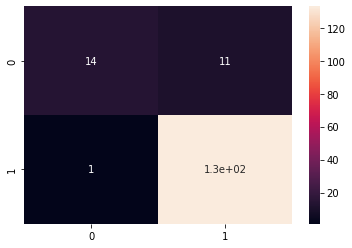

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

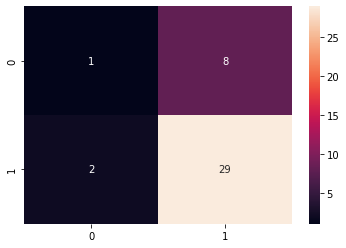

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.78      0.94      0.85        31

    accuracy                           0.75        40
   macro avg       0.56      0.52      0.51        40
weighted avg       0.68      0.75      0.70        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.73 %
Standard Deviation: 3.14 %


## Logistic Regression

In [ ]:
#importing the logistic regression class from scikit learn library
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression() #create LR Classifier
LR_classifier.fit(X_train, y_train) #applying fit function to connect the training set

LogisticRegression()

STEP#5: EVALUATING THE MODEL

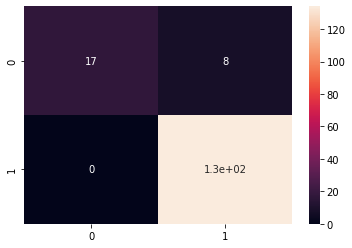

In [ ]:
#importing classification report & confusion_matrix from scikit learn library
from sklearn.metrics import classification_report, confusion_matrix


#train the dataset with LR classifier
y_predict_train = LR_classifier.predict(X_train)
y_predict_train

#Generate confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True) #generate heatmap

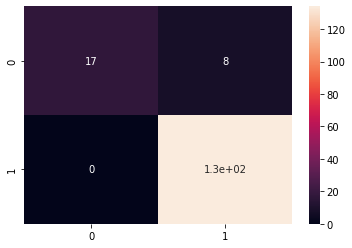

In [ ]:
#train the dataset with LR classifier
y_predict_train = LR_classifier.predict(X_train)
y_predict_train

#Generate confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True) #generate heatmap

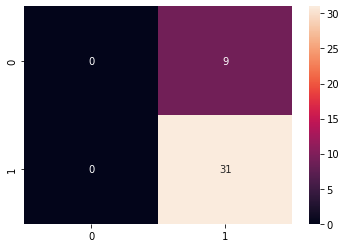

In [ ]:
# Predicting the Test set results
y_predict_test = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.78      1.00      0.87        31

    accuracy                           0.78        40
   macro avg       0.39      0.50      0.44        40
weighted avg       0.60      0.78      0.68        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.40 %
Standard Deviation: 1.42 %


## SVM

In [ ]:
from sklearn.svm import SVC

SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

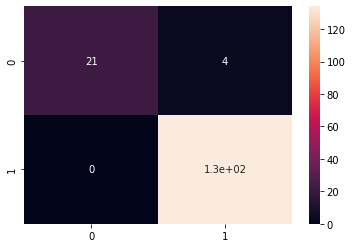

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = SVM_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

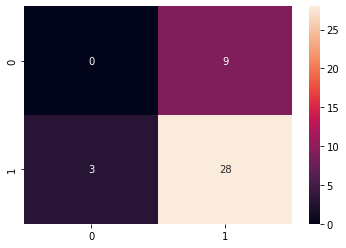

In [ ]:
# Predicting the Test set results
y_predict_test =SVM_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.76      0.90      0.82        31

    accuracy                           0.70        40
   macro avg       0.38      0.45      0.41        40
weighted avg       0.59      0.70      0.64        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.55 %
Standard Deviation: 5.75 %


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

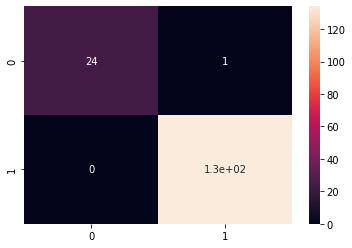

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = RF_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

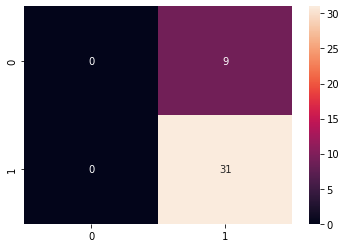

In [ ]:
# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.78      1.00      0.87        31

    accuracy                           0.78        40
   macro avg       0.39      0.50      0.44        40
weighted avg       0.60      0.78      0.68        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.25 %
Standard Deviation: 2.17 %


##GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

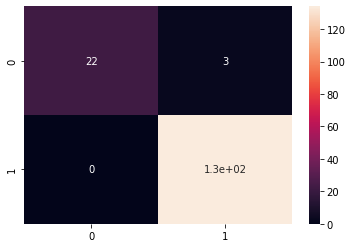

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

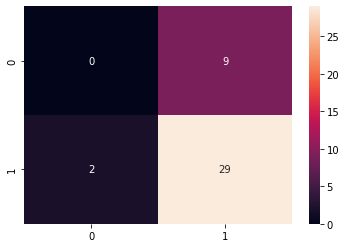

In [ ]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.76      0.94      0.84        31

    accuracy                           0.73        40
   macro avg       0.38      0.47      0.42        40
weighted avg       0.59      0.72      0.65        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GBDT_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.23 %
Standard Deviation: 4.29 %


## XGBoost

In [ ]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)

XGBClassifier()

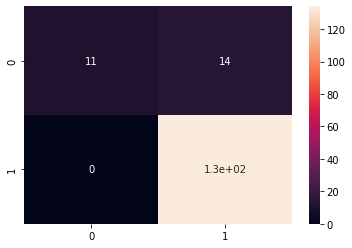

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

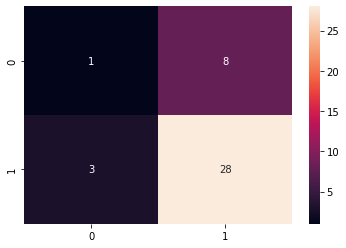

In [ ]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.78      0.90      0.84        31

    accuracy                           0.73        40
   macro avg       0.51      0.51      0.49        40
weighted avg       0.66      0.72      0.68        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.67 %
Standard Deviation: 2.97 %


## ROC Curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()


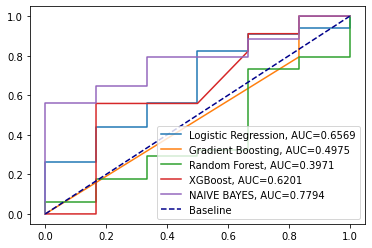

In [ ]:
#set up plotting area
plt.figure(0).clf()


#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc))

# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()

# STEP #5:  TF-IDF

In [ ]:
depressed_countvectorizer

<199x588 sparse matrix of type '<class 'numpy.int64'>'
	with 1778 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

depressed_tfidf = TfidfTransformer().fit_transform(depressed_countvectorizer)
print(depressed_tfidf.shape)

(199, 588)


In [ ]:
print(depressed_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 544)	0.3818112669031951
  (0, 474)	0.32308542576458316
  (0, 407)	0.357437840653979
  (0, 368)	0.36875108489735964
  (0, 341)	0.3474588520137993
  (0, 186)	0.2254264066083759
  (0, 178)	0.2841522477469879
  (0, 64)	0.27567282886935185
  (0, 49)	0.39725818363417964
  (1, 397)	0.5300468243166825
  (1, 317)	0.561090035789308
  (1, 32)	0.5300468243166825
  (1, 11)	0.35111066603216884
  (2, 551)	0.41359785581759845
  (2, 541)	0.34531662051513046
  (2, 533)	0.27397318871366627
  (2, 529)	0.47196162718609574
  (2, 130)	0.34531662051513046
  (2, 79)	0.35523408444910115
  (2, 68)	0.30230452907076527
  (2, 64)	0.27397318871366627
  (3, 521)	0.3450827910888917
  (3, 379)	0.24218835426150787
  (3, 316)	0.42920734990652104
  (3, 294)	0.42920734990652104
  :	:
  (198, 553)	0.21318733938365375
  (198, 530)	0.18682414284873775
  (198, 489)	0.16046094631382174
  (198, 486)	0.18682414284873775
  (198, 484)	0.16046094631382174
  (198, 468)	0.15197389267819508
  (198, 443)	0.18682414284873775
  (198

In [ ]:
X = depressed_tfidf
y = Label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## Naive_Bayes

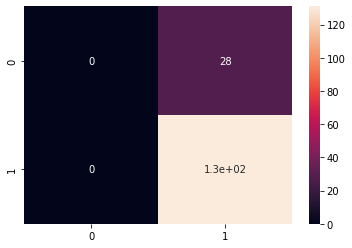

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

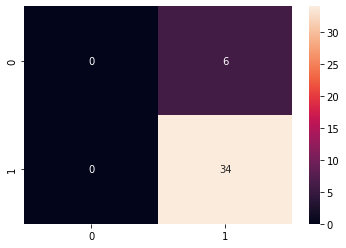

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.40 %
Standard Deviation: 1.42 %


## Logistic Regression

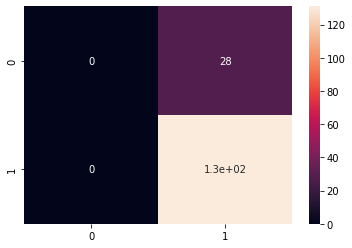

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = LR_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

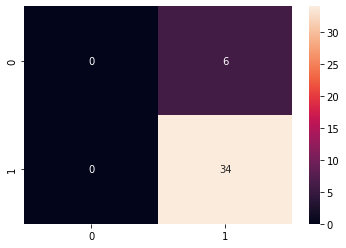

In [ ]:
# Predicting the Test set results
y_predict_test = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.40 %
Standard Deviation: 1.42 %


## SVM

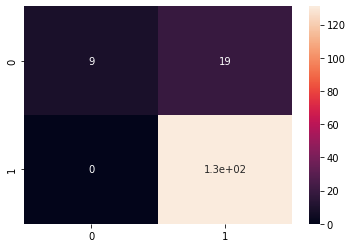

In [ ]:
from sklearn.svm import SVC

SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = SVM_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

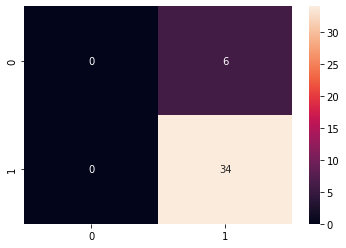

In [ ]:
# Predicting the Test set results
y_predict_test =SVM_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.40 %
Standard Deviation: 1.42 %


## RANDOM FOREST

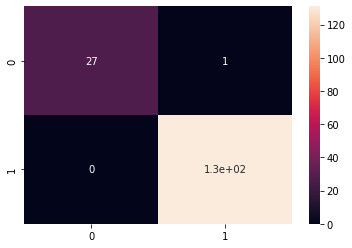

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = RF_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

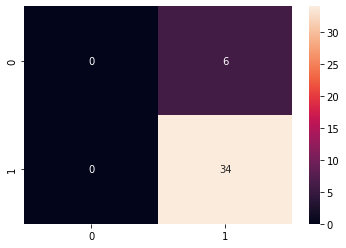

In [ ]:
# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



## Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.77 %
Standard Deviation: 2.24 %


## GBDT

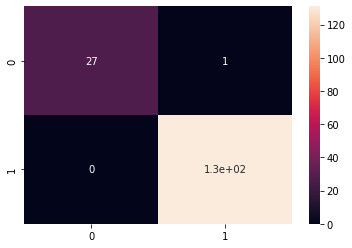

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

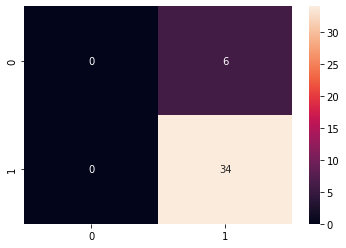

In [ ]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GBDT_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.88 %
Standard Deviation: 3.15 %


## XGBoost

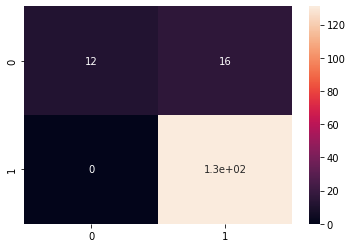

In [ ]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

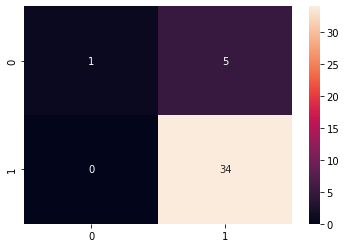

In [ ]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.87      1.00      0.93        34

    accuracy                           0.88        40
   macro avg       0.94      0.58      0.61        40
weighted avg       0.89      0.88      0.83        40



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.61 %
Standard Deviation: 5.40 %


## ROC Curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

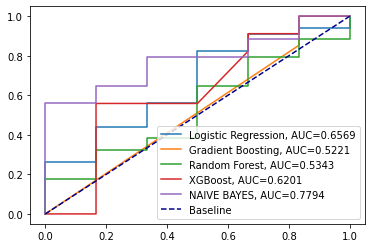

In [ ]:
#set up plotting area
plt.figure(0).clf()


#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc))

# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()